In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import statsmodels.api as sm
import numpy as np

%matplotlib notebook

In [373]:
PID = pd.read_csv('Police_Killings_and_Police_Inolved_Deaths_2021-10-28.csv',
                  index_col=['date'],parse_dates=['date'])

FNA = ['first_name','last_name','department','race','gender']
PID[FNA] = PID[FNA].fillna('Not Specified')

PID.shape


(1375, 38)

In [374]:

replace_Keys={'Replace_Keys':{
    'Aboriginal':'Indigenous',
    'Household Population For':'N',
    ' - ':' ',
    'Total visible minority population':'Total',
    'Total Household Population for':'N',
    'Total Population':'Population',
},
  'Columns':{},
    
}
with open('Spatial_Data/CensusNames.json', 'w') as fp:
    json.dump(replace_Keys, fp)

In [375]:
with open('Spatial_Data/CensusNames.json', 'r') as fp:
    name_Keys = json.load(fp)
name_Keys
Path = 'Spatial_Data/2016/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_02_33_01_647cde6efbb2fc246c3d34145d589ea7'

Census_2016 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values
name_Keys
for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()

name_Keys['Columns']['2016']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2016'][row[0]]=row['Name']
name_Keys

Cols_2016 = list(name_Keys['Columns']['2016'].values())
Census_2016=Census_2016.rename(columns=name_Keys['Columns']['2016'])
Census_2016[Cols_2016].sum()

C:\Users\User\.conda\envs\geo-env\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


indigenous_identity        1673791.0
n_indigenous_identity     34460068.0
females                   17887524.0
males                     17264204.0
population                35151728.0
visible_minority_black     1198540.0
n_visible_minority        34460068.0
visible_minority_total     7674575.0
dtype: float64

In [376]:
with open('Spatial_Data/CensusNames.json', 'r') as fp:
    name_Keys = json.load(fp)
name_Keys
Path = 'Spatial_Data/2019/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_05_22_49_491bf9a4259930aa7a779d25dae4fb09'

Census_2019 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values
name_Keys
for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()

name_Keys['Columns']['2019']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2019'][row[0]]=row['Name']
name_Keys

Cols_2019 = list(name_Keys['Columns']['2019'].values())
Census_2019=Census_2019.rename(columns=name_Keys['Columns']['2019'])
Census_2019[Cols_2019].sum()

indigenous_identity        1826555.0
n_indigenous_identity     36750837.0
population                37465430.0
females                   18887670.0
males                     18577760.0
visible_minority_black     1527504.0
n_visible_minority        36750837.0
visible_minority_total     9332201.0
dtype: float64

In [377]:

Path = 'Spatial_Data/2021/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_02_33_29_b1bb73ed1b44115f5efc8f2d899d4b13'

Census_2021 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values

for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
name_Keys['Columns']['2021']={}
for i,row in Cols.iterrows():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()
    

name_Keys['Columns']['2021']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2021'][row[0]]=row['Name']
name_Keys
    
Cols_2021 = list(name_Keys['Columns']['2021'].values())
Census_2021=Census_2021.rename(columns=name_Keys['Columns']['2021'])
# print(Cols_2021)
with open('Spatial_Data/CensusNames.json', 'w') as fp:
    json.dump(name_Keys, fp)
# name_Keys
Diff = (Census_2021[Cols_2021].sum().sort_index(ascending=False)-Census_2016[Cols_2021].sum().sort_index(ascending=False))
print(Diff/1e6)

visible_minority_total    1.839401
visible_minority_black    0.362945
population                2.982502
n_visible_minority        2.948565
n_indigenous_identity     2.948565
males                     1.684095
indigenous_identity       0.190306
females                   1.298407
dtype: float64


In [378]:
name_Keys['Pop_Trend']={}
X = sm.add_constant(X)
for c in Cols_2021:
    Y = [Census_2016[c].sum(),Census_2019[c].sum(),Census_2021[c].sum()]
    if c == 'population':
        X = [2016,2019,2021,2011,2006,2001]
        for v in [33476688,31612897,30007094]:
            Y.append(v)
    else:
        X = [2016,2019,2021]
    X = sm.add_constant(X)
    print(X,Y)
        
    model = sm.OLS(Y,X)
    results = model.fit()
    name_Keys['Pop_Trend'][c]=results.params#[1]
print(name_Keys['Pop_Trend'])

[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]] [1673791.0, 1826555.0, 1864097.0]
[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]] [34460068.0, 36750837.0, 37408633.0]
[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]
 [1.000e+00 2.011e+03]
 [1.000e+00 2.006e+03]
 [1.000e+00 2.001e+03]] [35151728.0, 37465430.0, 38134230.0, 33476688, 31612897, 30007094]
[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]] [17887524.0, 18887670.0, 19185931.0]
[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]] [17264204.0, 18577760.0, 18948299.0]
[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]] [1198540.0, 1527504.0, 1561485.0]
[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]] [34460068.0, 36750837.0, 37408633.0]
[[1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]
 [1.000e+00 2.021e+03]] [7674575.0, 9332201.0, 9513976.0]
{'indigenous_identity': array([-7.70942272e+07,  3.907

In [379]:
# PID

In [380]:
Daily = PID.groupby(PID.index).count().resample('D').asfreq()
Daily['Days']=1
# print(Daily)
Yearly = Daily.resample('Y').count()
# print(Yearly)
Scale = 1e6
Days = Yearly['Days'].max()
Death_Rate = []
Killing_Rate = []
Years = []
for y in range(2000,2022):
    Length = (Days/Yearly.loc[Yearly.index.year==y,'Days'].values[0])
    Years.append(str(y)+'-1-1')
    PM=((y*name_Keys['Pop_Trend']['population'][1]+name_Keys['Pop_Trend']['population'][0])/Scale)
    Death_Rate.append(((Yearly.loc[Yearly.index.year==y,'INDEX']/PM).values*Length)[0])
    
Daily = PID.loc[PID['Type']=='Police Killing'].groupby(PID.loc[PID['Type']=='Police Killing'].index).count().resample('D').asfreq()
Daily['Days']=1
Yearly = Daily.resample('Y').count()
Scale = 1e6
Days = Yearly['Days'].max()
for y in range(2000,2022):
    Length = (Days/Yearly.loc[Yearly.index.year==y,'Days'].values[0])
    PM=((y*name_Keys['Pop_Trend']['population'][1]+name_Keys['Pop_Trend']['population'][0])/Scale)
    Killing_Rate.append(((Yearly.loc[Yearly.index.year==y,'INDEX']/PM).values*Length)[0])
print(len(Years))    
Rate = pd.DataFrame(data={'date':Years,'PID_Rate':Death_Rate,'Killing_Rate':Killing_Rate})
# print(Rate)
Rate = Rate.set_index(pd.DatetimeIndex(Rate['date']))
# Rate

22


date
1987-01-20    Police Involved Death
1987-02-02    Police Involved Death
1987-02-08    Police Involved Death
1987-04-05    Police Involved Death
1987-04-16    Police Involved Death
                      ...          
2011-08-15           Police Killing
2013-02-15    Police Involved Death
2019-12-29           Police Killing
2020-10-04           Police Killing
2020-10-08           Police Killing
Name: Type, Length: 1375, dtype: object


<IPython.core.display.Javascript object>


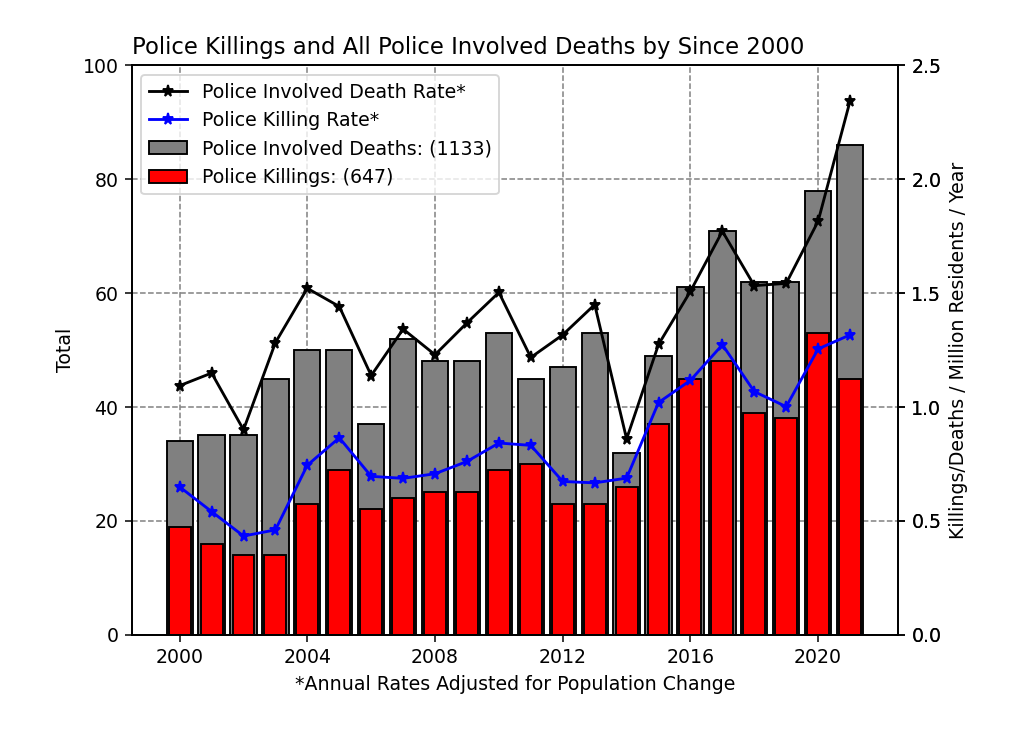

In [414]:
Class = 'Type'
print(PID['Type'])
# print(PID.loc[((PID.index.year>=2000))])
fig,ax=plt.subplots(1,figsize=(5.5,4))


Y = PID.loc[((PID.index.year>=2000))].resample('YS').count()['INDEX']
ax.bar(Y.index,Y,width = 300,edgecolor='k',facecolor='grey',label='Police Involved Deaths: ('+str(Y.sum())+')')
x2=ax.twinx()
x2.plot(Rate['PID_Rate'],color='k',marker='*',label='Police Involved Death Rate*')
ax.plot(Rate['PID_Rate']*np.nan,color='k',marker='*',label='Police Involved Death Rate*')
x2.set_ylim(0,2.5)
# ax.set_title('All Police Involved Deaths')




Y = PID.loc[((PID.index.year>=2000)&
            (PID.Type=='Police Killing'))].resample('YS').count()['INDEX']
ax.bar(Y.index,Y,width = 250,edgecolor='k',facecolor='#ff0000',label='Police Killings: ('+str(Y.sum())+')' )
x2=ax.twinx()
x2.plot(Rate['Killing_Rate'],color='blue',marker='*',label='Police Killing Rate*')
ax.plot(Rate['Killing_Rate']*np.nan,color='blue',marker='*',label='Police Killing Rate*')
x2.set_ylim(0,2.5)
ax.set_ylim(0,100)
ax.set_axisbelow(True)
ax.grid(color='grey', linestyle='--')
ax.set_ylabel('Total')
x2.set_ylabel('Killings/Deaths / Million Residents / Year')
ax.legend()
ax.set_title('Police Killings and All Police Involved Deaths by Since 2000',loc='left')
ax.set_xlabel('*Annual Rates Adjusted for Population Change')
plt.tight_layout()
plt.savefig('docs/Annual.png',dpi=400)

In [5]:
Year = [2000,2010,2016]
Year = [2021]
Pop = 38

for y in Year:

    Set = PID.loc[PID.index.year>=y]
    print('Deaths Since ',y, ':',Set.count()['INDEX'])
    print('Rate:',Set.count()['INDEX']/38/(2021-y))
    print()
    
    print('Killings Since ',y, ':',(Set.groupby('Type').count()['INDEX'])[1:].values[0])
#     print()
    print('Rate: ',(Set.groupby('Type').count()['INDEX']/Pop/(280/365))[1:].values[0])
    print()
    print()
# print(Set.groupby('Type').count()['INDEX'].sort_values())

Deaths Since  2021 : 86
Rate: inf

Killings Since  2021 : 45
Rate:  1.543703007518797




C:\Users\User\AppData\Local\Temp/ipykernel_25664/3795000982.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  print('Rate:',Set.count()['INDEX']/38/(2021-y))


In [69]:
Set.groupby('prov').count()['INDEX'].sort_values()

prov
PE      1
YT      1
NT      2
NB      3
NL      3
NU      6
NS      7
SK     17
MB     26
AB     69
BC     70
QC     74
ON    141
Name: INDEX, dtype: int64

In [66]:
Set.groupby('gender').count()['INDEX']/(Pop/2)/(2021-y)

gender
Female           0.557895
Male             3.789474
Not Specified    0.073684
Name: INDEX, dtype: float64

In [35]:


PID.groupby(['first_name']).count()['INDEX'].sort_values()#.unstack()

first_name
Aaron              1
Marissa            1
Marielle           1
Maria              1
Marcellus          1
                ... 
Daniel            16
Robert            17
Michael           17
David             20
Not Specified    222
Name: INDEX, Length: 615, dtype: int64

In [27]:
PID.groupby(['race']).count()['INDEX'].sort_values()#.unstack()

race
Unspecified         1
indegenous          1
Latin American      3
Middle Eastern      6
Other               6
South Asian        12
Asian              19
Black              57
Indigenous        163
White             276
Not Specified     831
Name: INDEX, dtype: int64

In [21]:
# T=PID.loc[((PID.index.year==2021)&(PID.index.month==9))
# PID['Date']=PID.index.values
PID[PID[['age','gender','department','Date','prov','city_town','first_name']].duplicated().values]

,INDEX,id_victim,first_name,last_name,middle_name,age,gender,race,prov,department,...,charge_type,extra_source,Comp,id_incident,ds_rank,alias_nickname,KCC_posts,cirucmstances_of_death,summary,Date
date,,,,,,,,,,,,,,,,,,,,,
2021-09-27,1233,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1234,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1235,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1236,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1237,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1238,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1239,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1240,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27
2021-09-27,1241,NaN,NaN,NaN,NaN,62,Male,Not Specified,QC,Sûreté du Québec,...,NaN,NaN,0.5,NaN,NaN,NaN,1954_KCC,NaN,NaN,2021-09-27


In [ ]:
def Doughnut(Set,Colors,ax):
    names = []
    size = []
    colors = []
    if Colors == 'Random':
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(np.random.rand(3))
    else:
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(Colors[a])
    my_circle=plt.Circle( (0,0), 0.5, facecolor='white',edgecolor='k')
    ax.pie(size, labels=names, colors=colors,wedgeprops={"edgecolor":"k"})
    ax.add_artist(my_circle)

Color_Scheme = {'Shooting':'#a6cee3','Use of Force':'#1f78b4','Other':'#b2df8a',
            'Off-Duty/Retired':'#33a02c'}

Color_Scheme = {'Shooting':'#a6cee3','Use of Force':'#1f78b4','Other':'#b2df8a',
            'Off-Duty/Retired':'#33a02c','Overdose':'#fb9a99','Suicide':'#e31a1c'}

#e31a1c

Data.CA_PoliceKillings['DEATH CATEGORY'].fillna('Other')
Death_Cat=Data.CA_PoliceKillings.groupby('DEATH CATEGORY').count()['NAME FIRST']
# print(Data.CA_PoliceKillings.index.date.min())
# print()

# Data.CA_PoliceKillings['DEATH CATEGORY'].fillna('Other')
Death_Cat=Final_Data.groupby('DEATH CATEGORY').count()['name']

print(Death_Cat)



fig,ax=plt.subplots(1,1,figsize = (6.65,4))
Doughnut(Death_Cat,Color_Scheme,ax)
ax.set_title('Police-Involved Deaths: January 2000 to June 2021 ('+str(Death_Cat.sum())+' Deaths)')

plt.savefig('Content/DeathsDistribution.png')